# Homework 4 Assignment 1

In [24]:
# As per coding convention, all imported packages will be displayed in the first line

# For python 2 and 3 compatibility
from __future__ import print_function

# Importing relevant packages
import numpy as np
import pylab as pl
import seaborn
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['title', 'norm', 'std']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [25]:
# Standardized population mean
popmean = 1000

In [26]:
# tell the system that i want to have 100 different sized samples, between 10 to 2000. 
np.random.seed(303) # seeding for reproducibility
samplesize = np.random.randint(11,2000,100)
samplesize

array([ 582, 1415,  541, 1164,  687, 1056, 1015, 1392, 1024, 1841, 1397,
        211,  381, 1577, 1558,  380,  191,  986, 1253,   60,  778,  943,
       1002, 1009, 1201, 1770, 1791,  956,  637, 1007,  487,  446,  116,
       1377,  723,  435,  127,  223, 1000,  910, 1065,  625,  854,   49,
       1760, 1663, 1245,  866,  711, 1224, 1393,  810,  357,  697, 1195,
       1899,  806, 1927,  717, 1932,  715,  854, 1062, 1795,  598, 1962,
        853, 1437,  677, 1914, 1166,  358,  866,  385, 1884, 1192, 1041,
        676, 1646,   44,  523,  997, 1307,  638,  110, 1890,  881, 1684,
        441, 1111, 1593,  214,  280, 1350, 1016,  588,  499,  649,  422,
       1236])

# Normal Distribution

In [27]:
# Chosen distributions = ['pois', 'normal', 'chisq', 'lnorm', 'binomial']
distributions = ['normal']

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


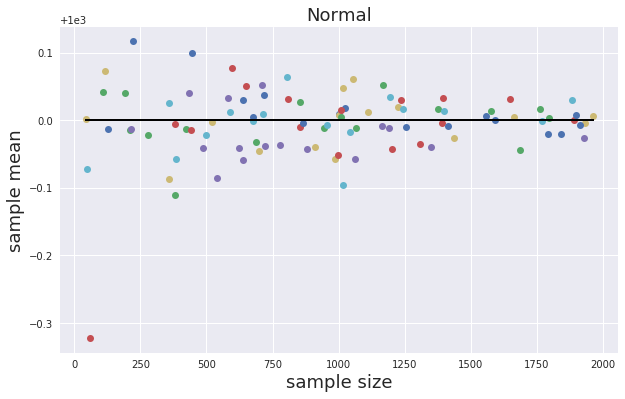

In [28]:
#Setting an empty dictionary and an empty key in dictionary
np.random.seed(303)
ovr = {}
ovr['normal'] = {} 

# filling up the empty key in dictionary

for n in samplesize:
    ovr['normal'][n] = np.random.normal(popmean, 1 , n)
       
ovr['normal']['samplemeans'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in ovr['normal']:
    if not type(nn) == str:
        ovr['normal']['samplemeans'][nn] = ovr['normal'][nn].mean()

# plotting
        axchisq_mu_n.plot(nn, ovr['normal']['samplemeans'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Normal', fontsize=18)
        axchisq_mu_n.plot([min(samplesize), max(samplesize)], [popmean, popmean], 'k')

Figure 1: Scatterplot of sample size against sample mean for the normal distribution. The observations is in line with the central limit theorem- the larger the sample size, the closer the sample means are to the population mean.   

Text(0.5,1,'Histogram of sample means for normal distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


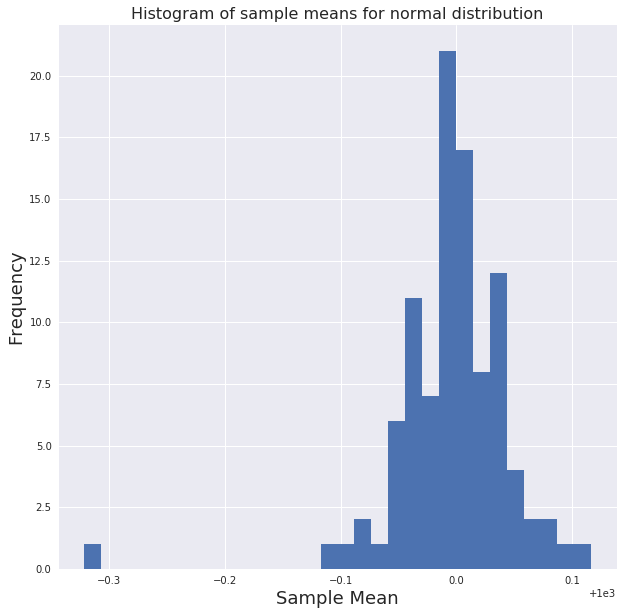

In [29]:
# save the sample means for plotting later, which is different for each sample. 
Nmeans = list(ovr['normal']['samplemeans'].values())

# plotting
pl.figure(figsize=(10, 10))
pl.hist(Nmeans,bins=30)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)
pl.title ('Histogram of sample means for normal distribution', fontsize = 16)

Figure 2: Histogram showing the frequency of sample means for normal distribution, centered around the mean of 1000. 

# Poisson Distribution

In [30]:
# Chosen distributions = ['pois', 'normal', 'chisq', 'lnorm', 'binomial']
distributions = ['pois']

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


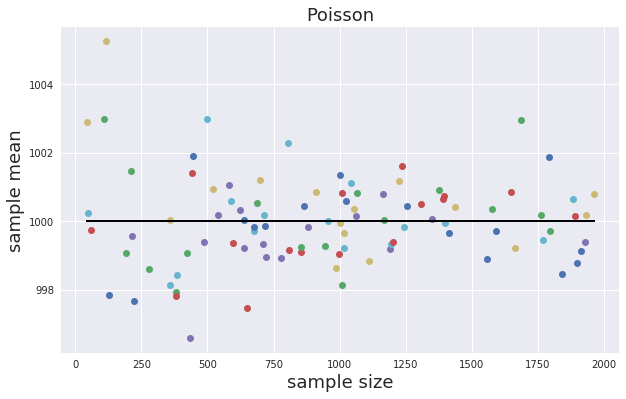

In [31]:
#Setting an empty dictionary and an empty key in dictionary
np.random.seed(303)
ovr = {}
ovr['pois'] = {} 

# filling up the empty key in dictionary

for n in samplesize:
    ovr['pois'][n] = np.random.poisson(popmean, n)
       
ovr['pois']['samplemeans'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in ovr['pois']:
    if not type(nn) == str:
        ovr['pois']['samplemeans'][nn] = ovr['pois'][nn].mean()

# plotting
        axchisq_mu_n.plot(nn, ovr['pois']['samplemeans'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Poisson', fontsize=18)
        axchisq_mu_n.plot([min(samplesize), max(samplesize)], [popmean, popmean], 'k')

Figure 3: Scatterplot of sample size against sample mean for the poisson distribution. The observations is in line with the central limit theorem- the larger the sample size, the closer the sample means are to the population mean.   

Text(0.5,1,'Histogram of sample means for poisson distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


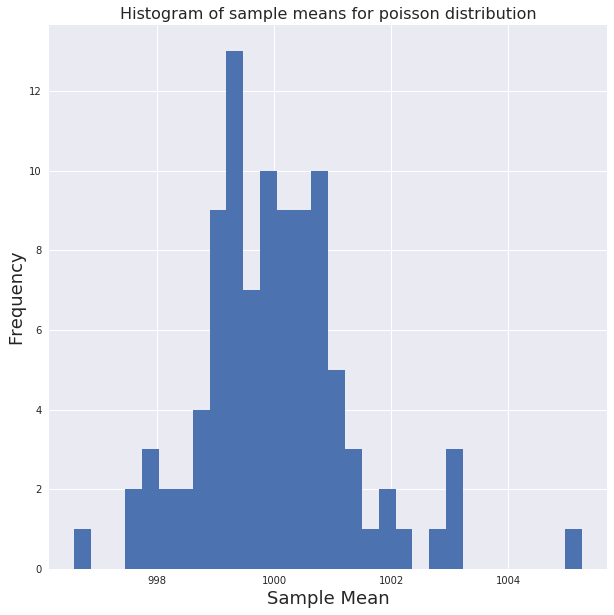

In [32]:
# save the sample means for plotting later, which is different for each sample. 
Pmeans = list(ovr['pois']['samplemeans'].values())

# plotting
pl.figure(figsize=(10, 10))
pl.hist(Pmeans,bins=30)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)
pl.title ('Histogram of sample means for poisson distribution', fontsize = 16)

Figure 4: Histogram showing the frequency of sample means for poisson distribution, centered around the mean of 1000.

# Binomial Distribution

In [33]:
# Chosen distributions = ['pois', 'normal', 'chisq', 'lnorm', 'binomial']
distributions = ['binomial']

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


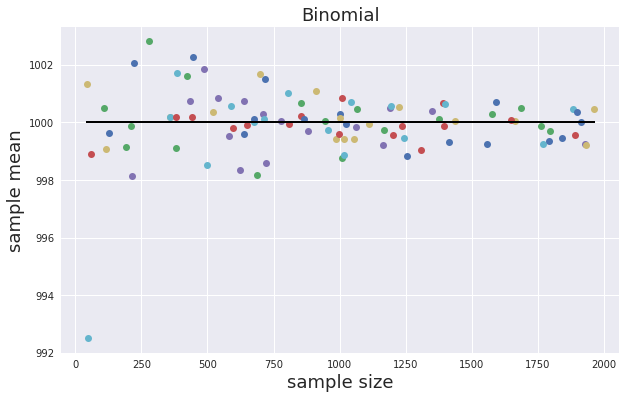

In [34]:
#Setting an empty dictionary and an empty key in dictionary
np.random.seed(303)
ovr = {}
ovr['binomial'] = {} 

# filling up the empty key in dictionary

for n in samplesize:
    ovr['binomial'][n] = np.random.binomial((popmean/0.5),0.5,n)
       
ovr['binomial']['samplemeans'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in ovr['binomial']:
    if not type(nn) == str:
        ovr['binomial']['samplemeans'][nn] = ovr['binomial'][nn].mean()

# plotting
        axchisq_mu_n.plot(nn, ovr['binomial']['samplemeans'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Binomial', fontsize=18)
        axchisq_mu_n.plot([min(samplesize), max(samplesize)], [popmean, popmean], 'k')

Figure 5: Scatterplot of sample size against sample mean for the binomial distribution. The observations is in line with the central limit theorem- the larger the sample size, the closer the sample means are to the population mean.   

Text(0.5,1,'Histogram of sample means for binomial distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


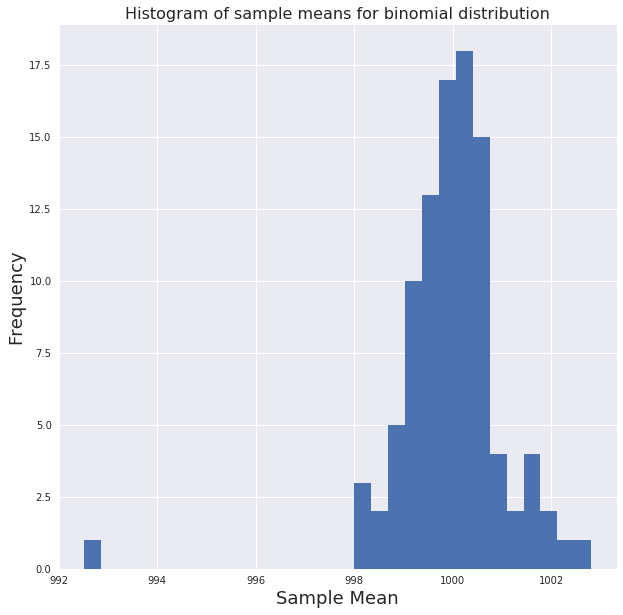

In [35]:
# save the sample means for plotting later, which is different for each sample. 
Bmeans = list(ovr['binomial']['samplemeans'].values())

# plotting
pl.figure(figsize=(10, 10))
pl.hist(Bmeans,bins=30)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)
pl.title ('Histogram of sample means for binomial distribution', fontsize = 16)

Figure 6: Histogram showing the frequency of sample means for binomial distribution, centered around the mean of 1000. 

# Chi-squared distribution

In [36]:
# Chosen distributions = ['pois', 'normal', 'chisq', 'lnorm', 'binomial']
distributions = ['chisq']

In [37]:
df = popmean

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


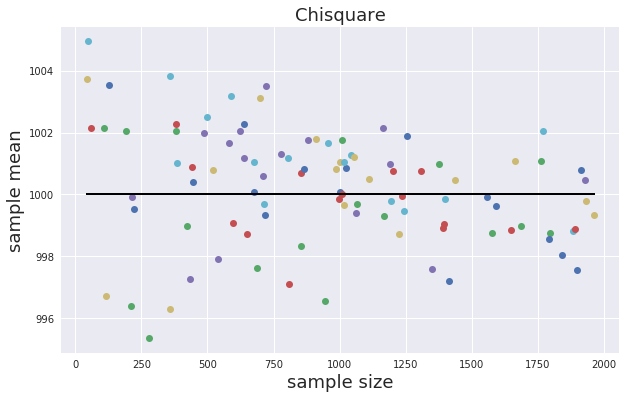

In [38]:
#Setting an empty dictionary and an empty key in dictionary
np.random.seed(303)
ovr = {}
ovr['chisq'] = {} 

# filling up the empty key in dictionary

for n in samplesize:
    ovr['chisq'][n] = np.random.chisquare(df,n)
   
ovr['chisq']['samplemeans'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in ovr['chisq']:
    if not type(nn) == str:
        ovr['chisq']['samplemeans'][nn] = ovr['chisq'][nn].mean()

# plotting
        axchisq_mu_n.plot(nn, ovr['chisq']['samplemeans'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chisquare', fontsize=18)
        axchisq_mu_n.plot([min(samplesize), max(samplesize)], [popmean, popmean], 'k')

Figure 7: Scatterplot of sample size against sample mean for the chisquare distribution. The observations is in line with the central limit theorem- the larger the sample size, the closer the sample means are to the population mean.   

Text(0.5,1,'Histogram of sample means for chisquare distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


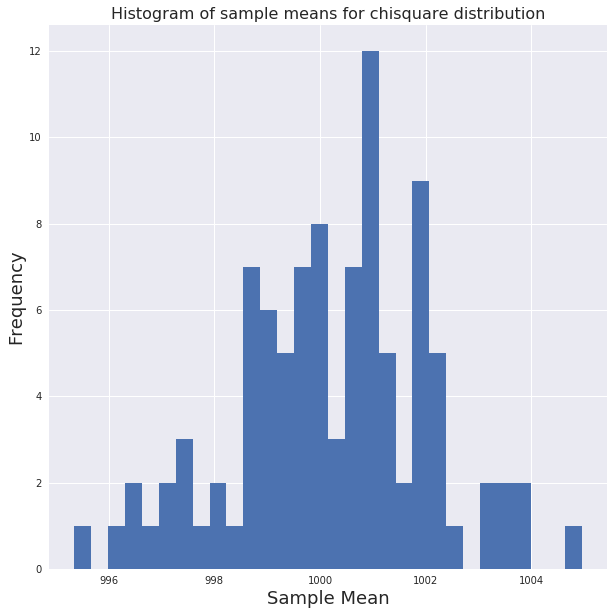

In [39]:
# save the sample means for plotting later, which is different for each sample. 
Cmeans = list(ovr['chisq']['samplemeans'].values())

# plotting
pl.figure(figsize=(10, 10))
pl.hist(Cmeans,bins=30)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)
pl.title ('Histogram of sample means for chisquare distribution', fontsize = 16)

Figure 8: Histogram showing the frequency of sample means for chisquare distribution, centered around the mean of 1000. 

# Lognormal distribution (chosen)

In [40]:
# Chosen distributions = ['pois', 'normal', 'chisq', 'lnorm', 'binomial']
distributions = ['lnorm']

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


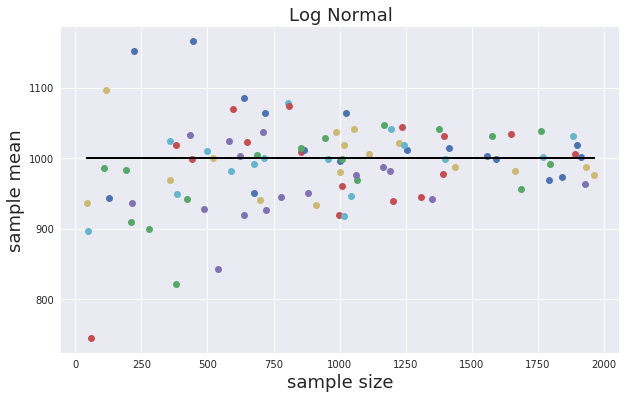

In [41]:
#Setting an empty dictionary and an empty key in dictionary
np.random.seed(303)
ovr = {}
ovr['lnorm'] = {} 

# filling up the empty key in dictionary

for n in samplesize:
    ovr['lnorm'][n] = np.random.lognormal(6.407,1,n)
    
ovr['lnorm']['samplemeans'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in ovr['lnorm']:
    if not type(nn) == str:
        ovr['lnorm']['samplemeans'][nn] = ovr['lnorm'][nn].mean()
        
# plotting
        axchisq_mu_n.plot(nn, ovr['lnorm']['samplemeans'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Log Normal', fontsize=18)
        axchisq_mu_n.plot([min(samplesize), max(samplesize)], [popmean, popmean], 'k')

Figure 9: Scatterplot of sample size against sample mean for the lognormal distribution. The observations is in line with the central limit theorem- the larger the sample size, the closer the sample means are to the population mean.   

Text(0.5,1,'Histogram of sample means for lognormal distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


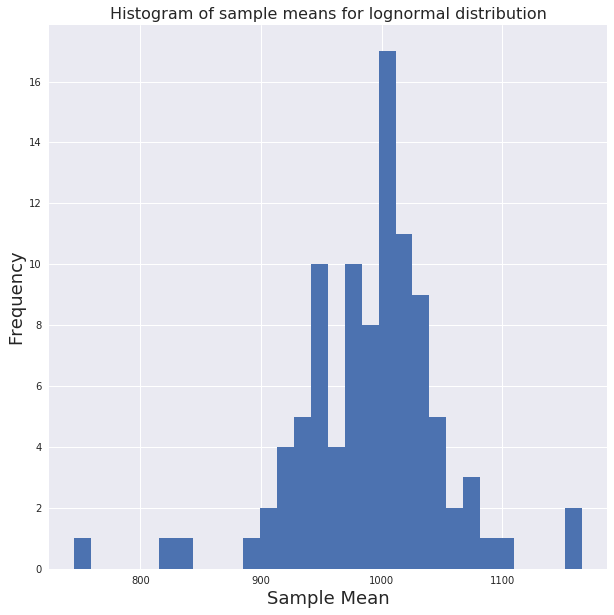

In [42]:
# save the sample means for plotting later, which is different for each sample. 
Lmeans = list(ovr['lnorm']['samplemeans'].values())

# plotting
pl.figure(figsize=(10, 10))
pl.hist(Lmeans,bins=30)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)
pl.title ('Histogram of sample means for lognormal distribution', fontsize = 16)

Figure 10: Histogram showing the frequency of sample means for lognormal distribution, centered around the mean of 1000. 

# And Finally...

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


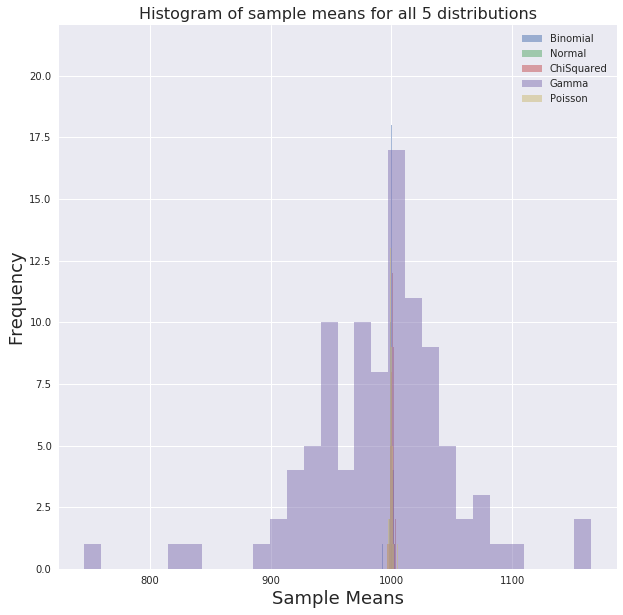

In [43]:
# Plotting all the histograms in one graph
pl.figure(figsize=(10, 10))
pl.hist(Bmeans, bins=30, alpha=0.5, label = 'Binomial')
pl.hist(Nmeans, bins=30, alpha=0.5, label = 'Normal')
pl.hist(Cmeans, bins=30, alpha=0.5, label = 'ChiSquared')
pl.hist(Lmeans, bins=30, alpha=0.5, label = 'Gamma')
pl.hist(Pmeans, bins=30, alpha=0.5, label ='Poisson')
pl.xlabel('Sample Means', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)
pl.title ('Histogram of sample means for all 5 distributions', fontsize = 16)
pyplot.legend(loc = 'upper right')

Figure 11: Histogram showing the frequency of sample means for all 5 chosen distributions, centered around the mean of 1000. 

# Extra Credit

Credits of code used in this section: https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data/20012350

In [44]:
from scipy.stats import norm

## Normal Distribution

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


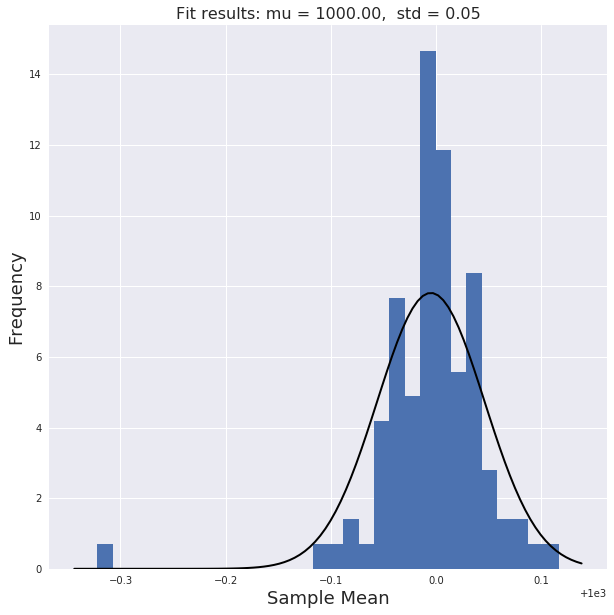

In [45]:
# Normal Distribution

pl.figure(figsize=(10, 10))
mu, std = norm.fit(Nmeans)
pl.hist(Nmeans,bins=30, normed=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title, fontsize= 16)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)

plt.show()

Figure 12: Histogram showing the frequency of sample means for normal distribution with fitted gaussian line, centered around the mean of 1000. 

## Poisson Distribution

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


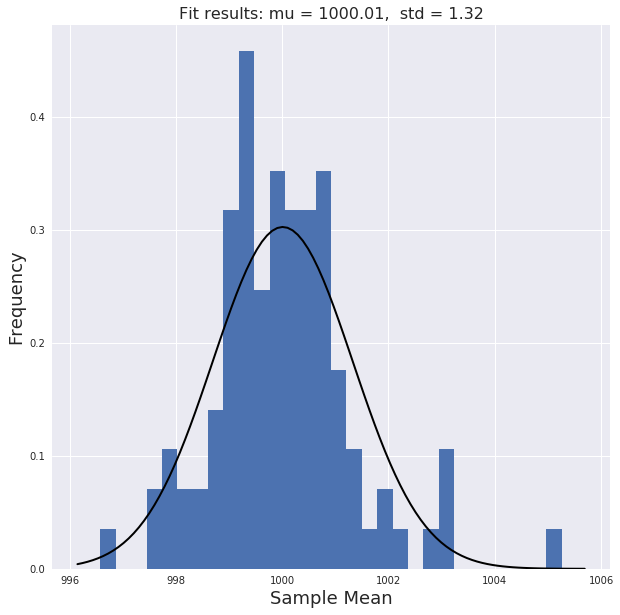

In [46]:
# Poisson Distribution

pl.figure(figsize=(10, 10))
mu, std = norm.fit(Pmeans)
pl.hist(Pmeans,bins=30, normed=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title, fontsize= 16)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)

plt.show()

Figure 13: Histogram showing the frequency of sample means for poisson distribution with fitted gaussian line, centered around the mean of 1000. 

## Binomial Distribution

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


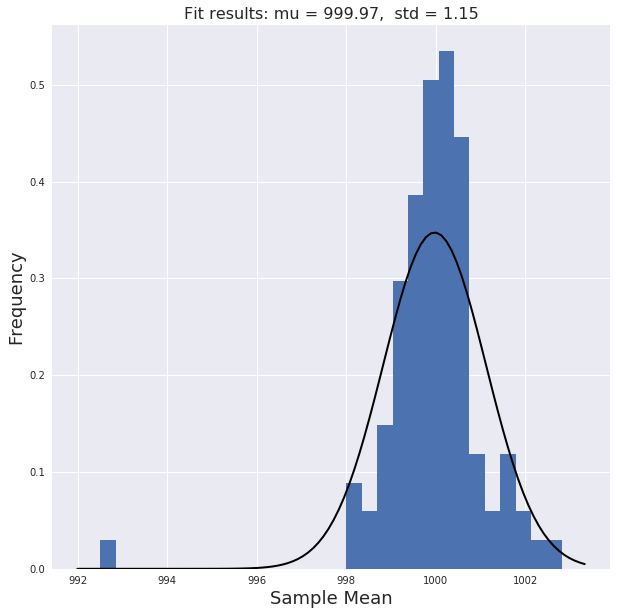

In [47]:
# Binomial Distribution

pl.figure(figsize=(10, 10))
mu, std = norm.fit(Bmeans)
pl.hist(Bmeans,bins=30, normed=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title, fontsize= 16)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)

plt.show()

Figure 14: Histogram showing the frequency of sample means for binomial distribution with fitted gaussian line, centered around the mean of 1000. 

## Chi-squared Distribution

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


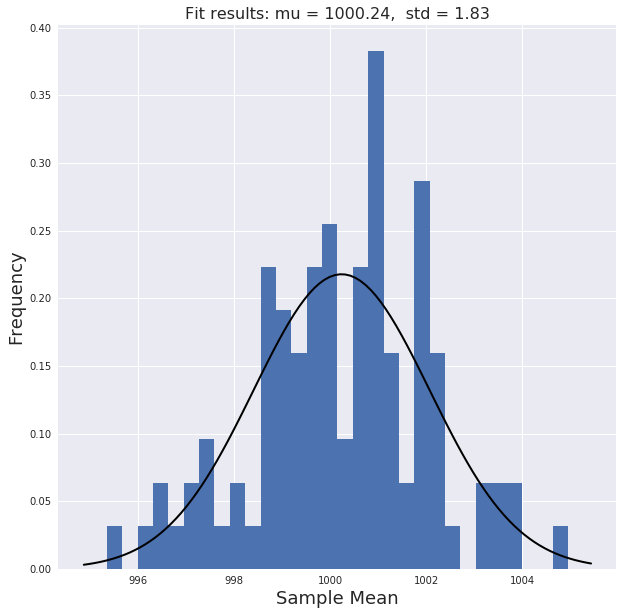

In [48]:
# Chi-squared Distribution

pl.figure(figsize=(10, 10))
mu, std = norm.fit(Cmeans)
pl.hist(Cmeans,bins=30, normed=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title, fontsize= 16)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)

plt.show()

Figure 15: Histogram showing the frequency of sample means for chisquared distribution with fitted gaussian line, centered around the mean of 1000. 

## Lognormal Distribution

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


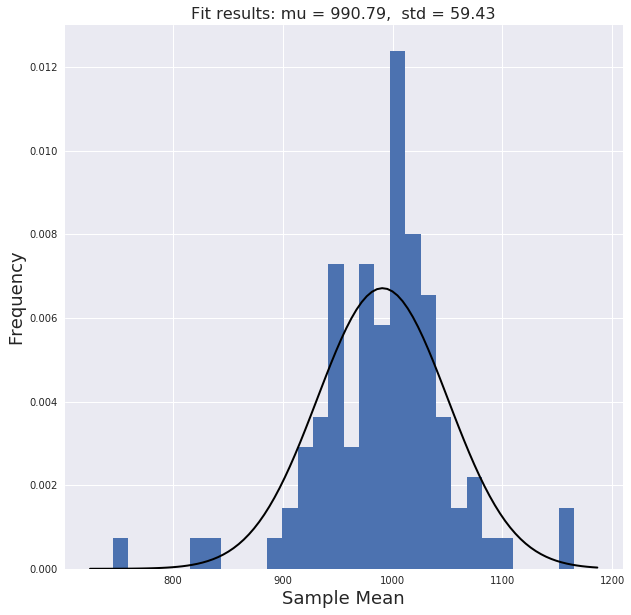

In [49]:
# Lognormal Distribution

pl.figure(figsize=(10, 10))
mu, std = norm.fit(Lmeans)
pl.hist(Lmeans,bins=30, normed=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title, fontsize= 16)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)

plt.show()

Figure 16: Histogram showing the frequency of sample means for lognormal distribution with fitted gaussian line, centered around the mean of 1000. 